# apache arrow transformations

In [5]:
import pyarrow as pa
import pyarrow.csv as csv
import pyarrow.parquet as pq
import pyarrow.compute as pc

abalone_file = "./dataset/abalone_train.csv"

In [22]:
abalone = csv.read_csv(abalone_file,
                       read_options=csv.ReadOptions(
                           column_names=["length","diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "age"],
                           use_threads=True
                       ) )

print(abalone)

pyarrow.Table
length: double
diameter: double
height: double
whole_weight: double
shucked_weight: double
viscera_weight: double
shell_weight: double
age: int64
----
length: [[0.435,0.585,0.655,0.545,0.545,...,0.605,0.7,0.53,0.395,0.45]]
diameter: [[0.335,0.45,0.51,0.425,0.42,...,0.475,0.525,0.42,0.315,0.355]]
height: [[0.11,0.125,0.16,0.125,0.13,...,0.18,0.19,0.13,0.105,0.12]]
whole_weight: [[0.334,0.874,1.092,0.768,0.879,...,0.9365,1.6015,0.8365,0.3515,0.412]]
shucked_weight: [[0.1355,0.3545,0.396,0.294,0.374,...,0.394,0.707,0.3745,0.1185,0.1145]]
viscera_weight: [[0.0775,0.2075,0.2825,0.1495,0.1695,...,0.219,0.365,0.167,0.091,0.0665]]
shell_weight: [[0.0965,0.225,0.37,0.26,0.23,...,0.295,0.43,0.249,0.1195,0.16]]
age: [[7,6,14,16,13,...,15,10,11,16,19]]


In [4]:
# write to parquet file

pq.write_table(abalone, where="./dataset/abalone.parquet")

In [13]:
# computations

ageFrequency = pc.value_counts(abalone["age"])

print(ageFrequency[0:3])

-- is_valid: all not null
-- child 0 type: int64
  [
    7,
    6,
    14
  ]
-- child 1 type: int64
  [
    307,
    200,
    97
  ]


In [21]:
lengthMeanGroupByAge = abalone.group_by("age")\
                              .aggregate([("length", "mean"),
                                          ("age", "count")])

print(lengthMeanGroupByAge)

pyarrow.Table
length_mean: double
age_count: int64
age: int64
----
length_mean: [[0.4210097719869706,0.37225,0.5789690721649483,0.5853508771929825,0.580483870967742,...,0.6075,0.645,0.075,0.695,0.15]]
age_count: [[307,200,97,57,155,...,2,1,1,2,1]]
age: [[7,6,14,16,13,...,27,25,1,24,2]]


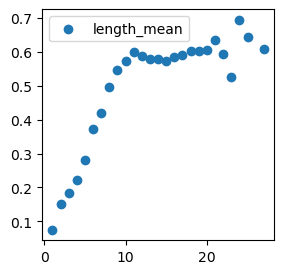

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3,3))
plt.scatter(x=lengthMeanGroupByAge["age"],
            y=lengthMeanGroupByAge["length_mean"],
            label="length_mean")

plt.legend()
plt.show()